# Binary Search Trees

### Review **tree** terminology:

- **Tree**: DAG (directed acyclic graph) with exactly one **root** (has no parents) and all other nodes have exactly one parent
- **root**: any node with no parents
- **leaf**: any node with no children

In [1]:
from graphviz import Graph, Digraph

### Is this a tree? If not, how do we make it into a tree?

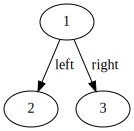

In [2]:
g = Digraph()
g.edge("1", "2", label="left")
g.edge("1", "3", label="right")
g

### Special cases of trees
- **Linked list**: a tree, where each node has *at most* one child
- **Binary tree**:  a tree, where each has *at most* two children

### Review: recursive functions
1. *Category 1*: functions that return some computation
2. *Category 2*: functions that do some action (for example: printing, appending, etc.,)

## Binary tree

In [3]:
# TODO: define Node class
class Node:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    

    # Category 2: functions that do some action
    def dump(self, prefix="", suffix=""):
        """
        prints out name of every node in the tree with some basic formatting
        """
        # TODO: what is the simplest example in this case?
        print(prefix, self.label, suffix)
        # recurse left
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        # recurse right
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # Category 1: functions that return some computation
    def search(self, target):
        """
        returns True/False, if target is somewhere in the tree
        """
        if target == self.label:
            return True

        if self.left != None:
            if self.left.search(target):
                return True
        
        if self.right != None:
            if self.right.search(target):
                return True
        
        return False

node1 = Node(1)
node2 = Node(2)
node3 = Node(3)
node4 = Node(4)
node1.left = node2
node1.right = node3
node2.left = node4
node1.dump()

 1 
	 2 (LEFT)
		 4 (LEFT)
	 3 (RIGHT)


### Let's come up with testcases for `search(...)`

In [4]:
print(node1.search(1)) # should be True
print(node1.search(2)) # should be True
print(node1.search(3)) # should be True
print(node1.search(4)) # should be True
print(node1.search(5)) # should be False

True
True
True
True
False


#### How many times is search(...) called, in the worst case?  
- Assume tree has *N* nodes.  
- Complexity is: **O(N)**

## Binary Search Tree

- special case of *Binary trees*
- **BST rule**: any node's value is bigger than every value in its left subtree, and and smaller than every value in its right subtree
- TODO: write an efficient search for a BST (better complexity than O(N)
- TODO: write a method to add values to a BST, while preserving the BST rule

In [5]:
class BSTNode:
    def __init__(self, label):
        self.label = label
        self.left = None
        self.right = None
    
    # Category 2: functions that do some action
    def dump(self, prefix="", suffix=""):
        """
        prints out name of every node in the tree with some basic formatting
        """
        print(prefix, self.label, suffix)
        if self.left != None:
            self.left.dump(prefix+"\t", "(LEFT)")
        if self.right != None:
            self.right.dump(prefix+"\t", "(RIGHT)")
            
    # Category 1: functions that return some computation
    def search(self, target):
        """
        returns True/False, if target is somewhere in the tree
        """
        if target == self.label:
            return True
        elif target < self.label:
            if self.left != None:
                if self.left.search(target):
                    return True
        elif target > self.label:
            if self.right != None:
                if self.right.search(target):
                    return True
        
        return False

### Does this tree satisfy BST rule? If not, which node violates it and how can we fix its position?
- Let's not displace other children node to find a new spot for the node in violation of BST rule.

In [6]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
root.right.left.left = BSTNode(8)
root.dump()

 10 
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
	 15 (RIGHT)
		 12 (LEFT)
			 8 (LEFT)
		 19 (RIGHT)


### BST after fix

In [7]:
root = BSTNode(10)
root.left = BSTNode(2)
root.left.left = BSTNode(1)
root.left.right = BSTNode(4)
root.left.right.right = BSTNode(8)
root.left.right.left = BSTNode(3)
root.right = BSTNode(15)
root.right.left = BSTNode(12)
root.right.right = BSTNode(19)
#root.right.left.left = Node(8)
root.dump()

 10 
	 2 (LEFT)
		 1 (LEFT)
		 4 (RIGHT)
			 3 (LEFT)
			 8 (RIGHT)
	 15 (RIGHT)
		 12 (LEFT)
		 19 (RIGHT)


In [8]:
# TODO: update "search(...)" definition for BSTNode

### Testcases for BST `search(...)`

In [9]:
print(root.search(10)) # should be True
print(root.search(11)) # should be False
print(root.search(19)) # should be True
print(root.search(5))  # should be False

True
False
True
False


#### How many times is BST search(...) called, in the worst case?  
- Assume tree has *N* nodes.  
- Complexity is: **O(h)**, where **h** is the height of the tree.